

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>







<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

# Cafeteria de LA - Garçons robôs 

* Maria Sofia
* Data: 10/03/2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_us = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
# Verificando valores ausentes
df_us.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [4]:
# Preencher o valor mais frequente
moda_chain = df_us['chain'].mode()[0]
df_us['chain'].fillna(moda_chain, inplace=True)

In [5]:
# Verificando duplicados
df_us.duplicated().sum()

0

In [6]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


In [7]:
df_us.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



 ## Proporções dos estabelecimentos

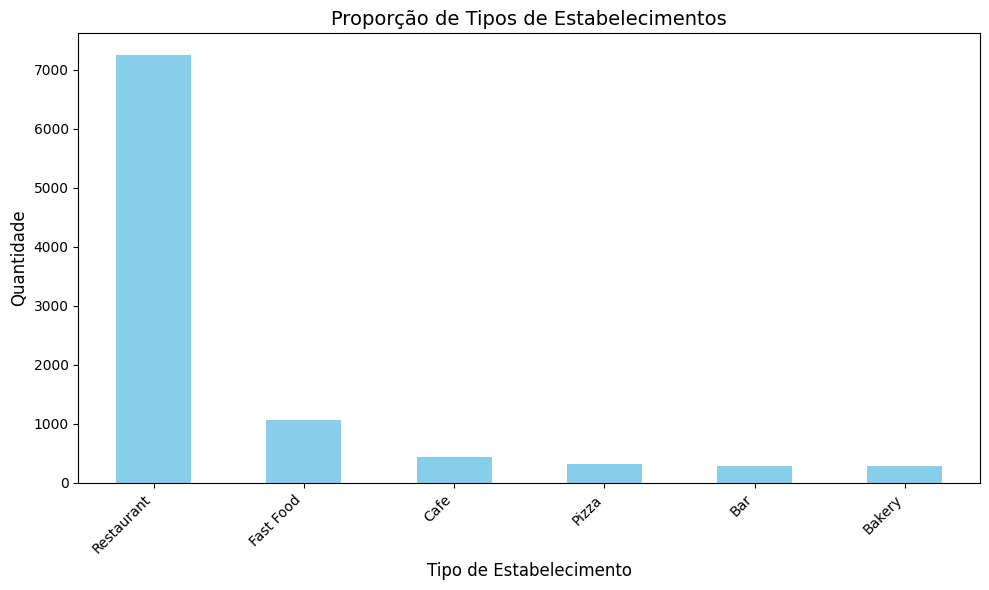

In [8]:
# Contar as ocorrências de cada tipo de estabelecimento
proporcoes_estabelecimentos = df_us['object_type'].value_counts()

# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
proporcoes_estabelecimentos.plot(kind='bar', color='skyblue')
plt.title('Proporção de Tipos de Estabelecimentos', fontsize=14)
plt.xlabel('Tipo de Estabelecimento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
print (proporcoes_estabelecimentos)

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tipos de estabelecimentos investigados!
</div>



## Proporções de estabelecimentos de rede e não rede

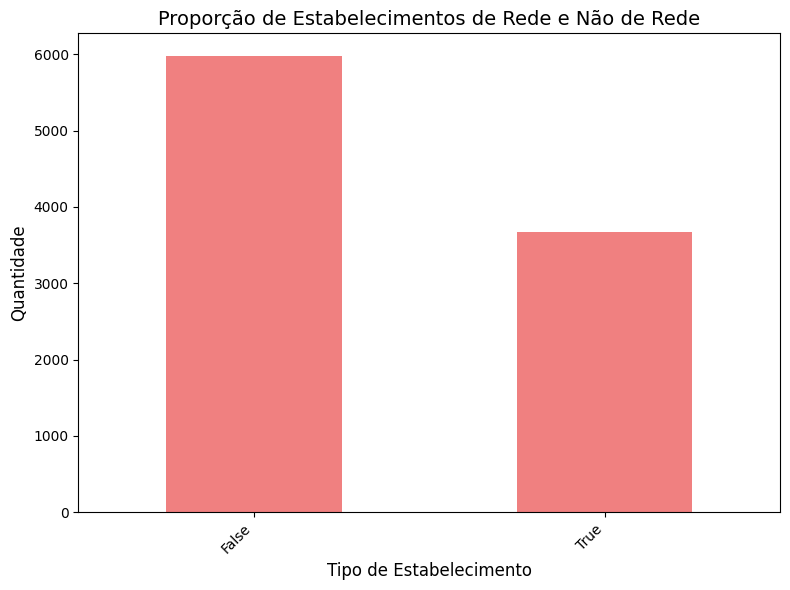

In [10]:
# Contar as ocorrências de estabelecimentos de rede e não de rede
proporcoes_chain = df_us['chain'].value_counts()

# Plotar um gráfico de barras
plt.figure(figsize=(8, 6))
proporcoes_chain.plot(kind='bar', color='lightcoral')
plt.title('Proporção de Estabelecimentos de Rede e Não de Rede', fontsize=14)
plt.xlabel('Tipo de Estabelecimento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
print (proporcoes_chain)

False    5975
True     3676
Name: chain, dtype: int64


* Qual tipo de estabelecimento é típico para redes?

Restaurantes e fast food

* O que caracteriza redes?

Na maioria dos casos, redes de fast food ou cafés rápidos tendem a ter muitos estabelecimentos com um número menor de assentos, já que o objetivo principal dessas redes é expandir rapidamente e oferecer conveniência ao cliente. O foco é na velocidade de serviço e na eficiência operacional, mais do que no conforto prolongado do cliente no local.

Já restaurantes mais sofisticados ou de padrão elevado podem ter um modelo de menos unidades com mais assentos, buscando proporcionar uma experiência diferenciada.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Proporção de redes investigada! Bem como seu tipo de estabelecimento característico.
</div>



##  Média de restaurantes tem o maior número de assentos

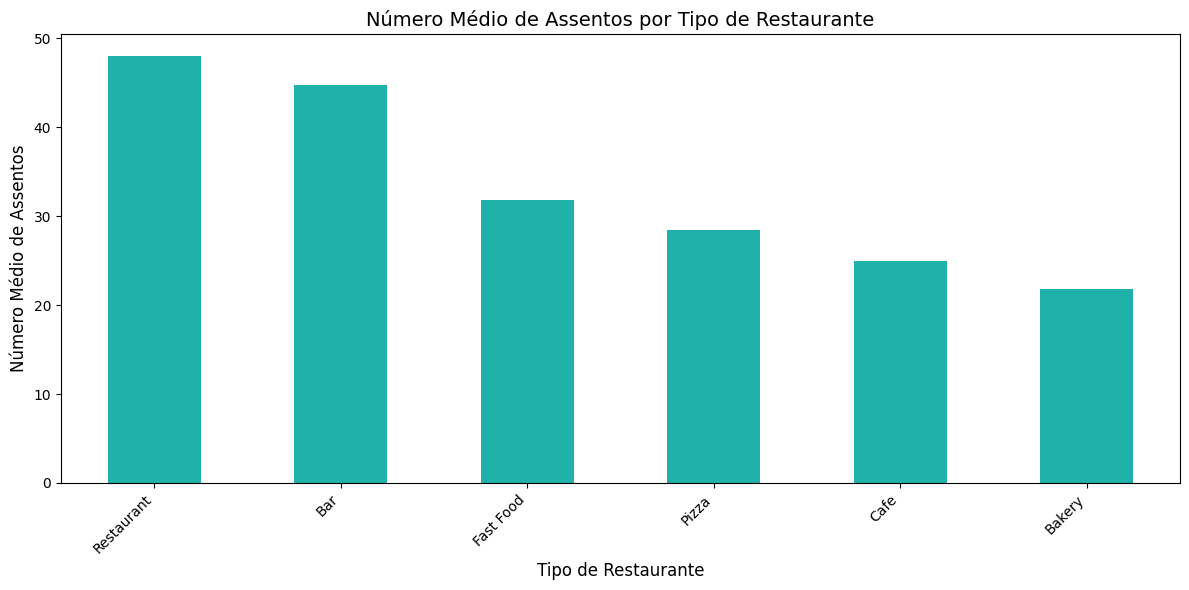

In [12]:
# Calcular o número médio de assentos para cada tipo de restaurante
media_assentos_tipo = df_us.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Plotar gráfico de barras do número médio de assentos por tipo de restaurante
plt.figure(figsize=(12, 6))
media_assentos_tipo.plot(kind='bar', color='lightseagreen')
plt.title('Número Médio de Assentos por Tipo de Restaurante', fontsize=14)
plt.xlabel('Tipo de Restaurante', fontsize=12)
plt.ylabel('Número Médio de Assentos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
print (media_assentos_tipo)

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Média de assentos por tipo de estabelecimento foi devidamente endereçada.
</div>



## Coluna separada com os nomes das ruas da coluna "address"

In [14]:
# Usando uma expressão regular mais robusta
df_us['street_name'] = df_us['address'].str.replace(r'[^a-zA-ZÀ-ÿ\s]', '', regex=True)
#extract(r'([A-Za-zÀ-ÿ\s]+(?:\s[A-Za-zÀ-ÿ]+)*)(?=\s\d|$)')

# Exibe as primeiras linhas para verificar o resultado
print(df_us[['address', 'street_name']].head(10))


                           address               street_name
0           3708 N EAGLE ROCK BLVD         N EAGLE ROCK BLVD
1                100 WORLD WAY 120                WORLD WAY 
2          6801 HOLLYWOOD BLVD 253           HOLLYWOOD BLVD 
3               1814 W SUNSET BLVD             W SUNSET BLVD
4               2100 ECHO PARK AVE             ECHO PARK AVE
5              10004 NATIONAL BLVD             NATIONAL BLVD
6                100 WORLD WAY 126                WORLD WAY 
7            3500 W 6TH ST STE 226              W TH ST STE 
8  3027 N SAN FERNANDO RD UNIT 103   N SAN FERNANDO RD UNIT 
9             3707 N CAHUENGA BLVD           N CAHUENGA BLVD




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Maria, é possível ver que certas ruas acabaram não sendo corretamente isoladas:
    
      7            3500 W 6TH ST STE 226                        W
    
Tente algo parecido com isso:
    
    df['street_name'] = df['address'].str.replace(r'[^a-zA-ZÀ-ÿ\s]', '', regex=True)
    
    
Retomaremos a revisão a partir daqui após os ajustes, combinado?
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ajuste realizado com sucesso!
</div>

## Dez ruas com o maior número de restaurantes

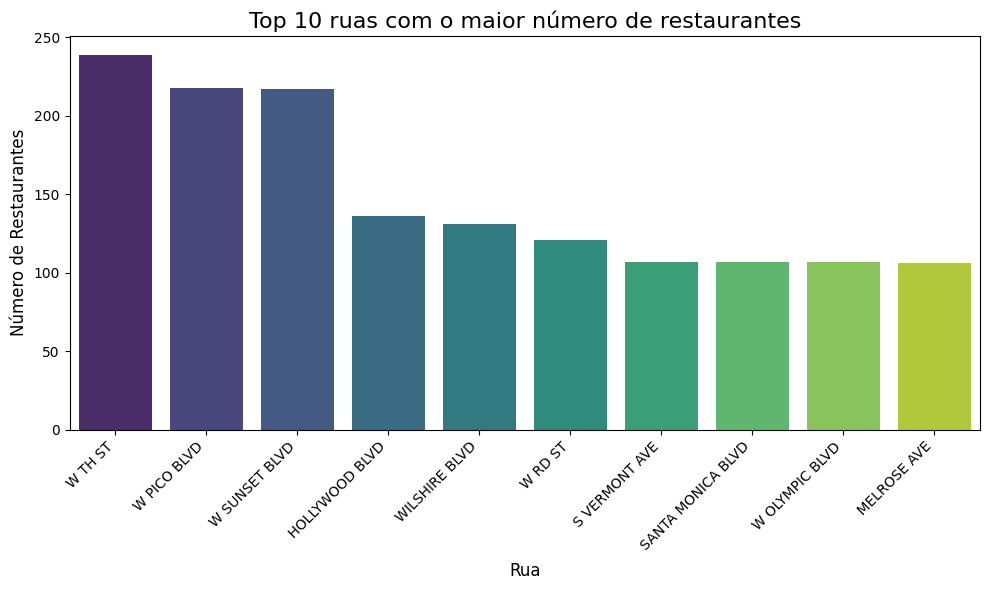

In [15]:
# Filtrar para selecionar apenas as linhas onde o tipo é "Restaurant"
restaurants = df_us[df_us['object_type'] == 'Restaurant']

# Agrupar por rua (street_name) e contar o número de restaurantes
street_counts = restaurants['street_name'].value_counts().head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=street_counts.index, y=street_counts.values, palette='viridis')

# Definir título e rótulos
plt.title('Top 10 ruas com o maior número de restaurantes', fontsize=16)
plt.xlabel('Rua', fontsize=12)
plt.ylabel('Número de Restaurantes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [19]:
print (street_counts)

 W TH ST              239
 W PICO BLVD          218
 W SUNSET BLVD        217
 HOLLYWOOD BLVD       136
 WILSHIRE BLVD        131
                     ... 
 W EXPOSITION BLVD      1
 S WESTERN AVE AB       1
 IDELL ST               1
 BELLAGIO RD            1
 S VERMONT AVE C        1
Name: street_name, Length: 1434, dtype: int64


Observação: Não estou conseguindo trazer corretamente o nome das ruas. 

Exemplo: A rua "W 6TH ST STE" só está trazendo o "W"


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ranking elaborado com sucesso!
</div>

## Número de ruas que têm apenas um restaurante

In [20]:
# Filtrar para selecionar apenas os restaurantes
restaurants = df_us[df_us['object_type'] == 'Restaurant']

# Agrupar por rua e contar o número de restaurantes por rua
street_counts = restaurants['street_name'].value_counts()

# Contar o número de ruas com exatamente um restaurante
num_streets_with_one_restaurant = (street_counts == 1).sum()

print(f"Número de ruas com apenas um restaurante: {num_streets_with_one_restaurant}")


Número de ruas com apenas um restaurante: 871


## Distribuição de número de assentos para as ruas com muitos restaurantes

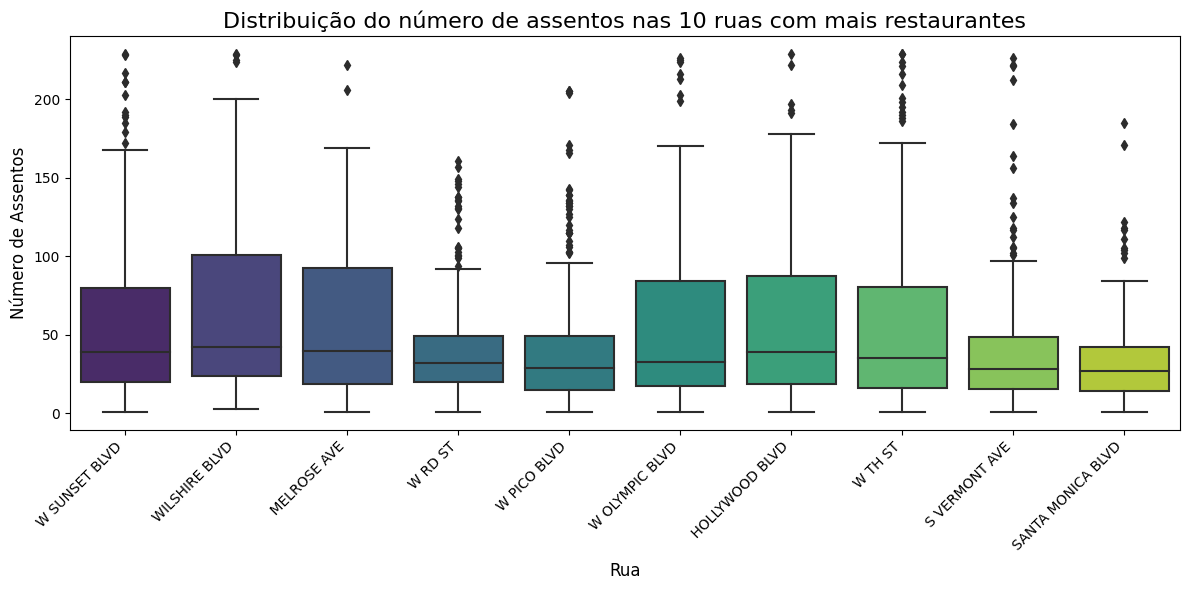

                    count       mean        std  min    25%   50%     75%  \
street_name                                                                 
 HOLLYWOOD BLVD     136.0  58.441176  55.454855  1.0  18.75  39.0   87.50   
 MELROSE AVE        106.0  55.216981  48.520394  1.0  18.50  39.5   92.75   
 S VERMONT AVE      107.0  47.841121  52.228119  1.0  15.50  28.0   48.50   
 SANTA MONICA BLVD  107.0  35.158879  34.339358  1.0  14.00  27.0   42.50   
 W OLYMPIC BLVD     107.0  59.644860  61.675238  1.0  17.50  33.0   84.00   
 W PICO BLVD        218.0  45.215596  43.407875  1.0  15.00  29.0   49.00   
 W RD ST            121.0  47.421488  42.755653  1.0  20.00  32.0   49.00   
 W SUNSET BLVD      217.0  55.705069  52.391649  1.0  20.00  39.0   80.00   
 W TH ST            239.0  55.673640  55.514270  1.0  16.00  35.0   80.50   
 WILSHIRE BLVD      131.0  67.068702  60.026685  3.0  24.00  42.0  101.00   

                      max  
street_name                
 HOLLYWOOD BLVD    

In [21]:
# Filtrar as ruas com maior número de restaurantes
top_streets = df_us[df_us['object_type'] == 'Restaurant']['street_name'].value_counts().head(10).index

# Filtrar o DataFrame para manter apenas os restaurantes nessas ruas
restaurants_top_streets = df_us[(df_us['street_name'].isin(top_streets)) & (df_us['object_type'] == 'Restaurant')]

# Plotar a distribuição do número de assentos por rua
plt.figure(figsize=(12, 6))
sns.boxplot(x='street_name', y='number', data=restaurants_top_streets, palette='viridis')

# Título e rótulos
plt.title('Distribuição do número de assentos nas 10 ruas com mais restaurantes', fontsize=16)
plt.xlabel('Rua', fontsize=12)
plt.ylabel('Número de Assentos', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibir gráfico
plt.tight_layout()
plt.show()

# Exibir as estatísticas descritivas do número de assentos
print(restaurants_top_streets.groupby('street_name')['number'].describe())


* Ruas populares tendem a ter um número maior de assentos em média.
* Diversidade no tamanho dos restaurantes (tanto grandes quanto pequenos estabelecimentos) é comum nas ruas com grande fluxo de clientes, como WILSHIRE BLVD e W SUNSET BLVD.
* Ruas com baixa variação no número de assentos, como E, indicam que os restaurantes tendem a ter tamanhos semelhantes.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Análises no recorte devidamente realizadas.
</div>

## Conclusão:

O mercado de cafeterias em Los Angeles oferece um cenário promissor, com um número considerável de estabelecimentos (435), e um público crescente que valoriza conveniência e inovação. A análise das tendências do mercado e a distribuição dos estabelecimentos mostram que, embora a concorrência seja intensa, há espaço para novos negócios, especialmente se a cafeteria souber se destacar e oferecer algo único. A introdução de garçons robôs pode ser um grande atrativo inicial, atendendo à demanda por tecnologia e experiências inovadoras, características muito valorizadas na cidade.

Além disso, a análise das ruas com maior concentração de restaurantes, como **W** e **Hollywood Blvd**, revela que áreas movimentadas e centrais são ideais para garantir alta visibilidade e atrair um público diversificado. Contudo, é importante observar que a inovação, como a utilização de garçons robôs, pode gerar um impacto inicial significativo, mas é essencial que o sucesso a longo prazo não dependa apenas da novidade. A chave será oferecer uma experiência contínua e de qualidade, com um ambiente acolhedor e um serviço eficiente, que combine a tecnologia com um toque humano.

Em relação à sustentabilidade do negócio, é importante lembrar que o mercado de cafeterias está em crescimento, mas a concorrência também é alta. A diferenciação será fundamental, seja pela tecnologia inovadora, pela qualidade do café, pelo ambiente acolhedor ou pela localização estratégica. Com um planejamento bem estruturado, investimentos em marketing e foco na experiência do cliente, sua cafeteria tem o potencial de prosperar, mesmo após a "novidade" dos garçons robôs se estabilizar. Para garantir o sucesso a longo prazo, é essencial investir em estratégias que mantenham o interesse dos consumidores e consolidem a marca no mercado local.

Por fim, a combinação de inovação, qualidade e uma boa localização será crucial para atrair investidores e garantir que o negócio continue a crescer e prosperar no competitivo mercado de Los Angeles.

***Em resumo:***
* O mercado de cafeterias está em crescimento, com muitas oportunidades para negócios novos. A inovação, como garçons robôs, pode atrair inicialmente clientes, mas o sucesso a longo prazo dependerá de um serviço de qualidade e uma experiência diferenciada.

* Áreas centrais, como W e Hollywood Blvd, são ideais para visibilidade. A diferenciação será chave para se destacar na competição, seja pela tecnologia, qualidade do produto ou ambiente.

* O sucesso contínuo dependerá de estratégias que mantenham o interesse do cliente, com foco em uma boa experiência e consistência. O uso de inovação e marketing será essencial para manter o crescimento, mesmo após a novidade inicial dos garçons robôs.

 Presentation: <https://1drv.ms/p/s!AodJYqoWm9F_ZgAApjndiqsWUuU?e=8BDlor>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Conclusão e apresentação presentes.
</div>